# "Signal Processing with Julia Language- Part 5"
> "Sinusoidal Signals and Synthesis"
- toc: true
- badges: true
- comments: true
- categories: [jupyter, SignalProcessing]

# Sinusoidal Sequence

### Defined as:


$$x(n) = sin(ω.n + φ), \forall n  \in \mathbb{ N}$$



In [21]:
#collapse-show
# Load dependencies

using MySignalProcessing
using Plots

In [22]:
# plot sinusoidal signal
# with 100 samples every 2 full 2pi cycles
s = 1.0 * sinseq(0,100, 0.125);

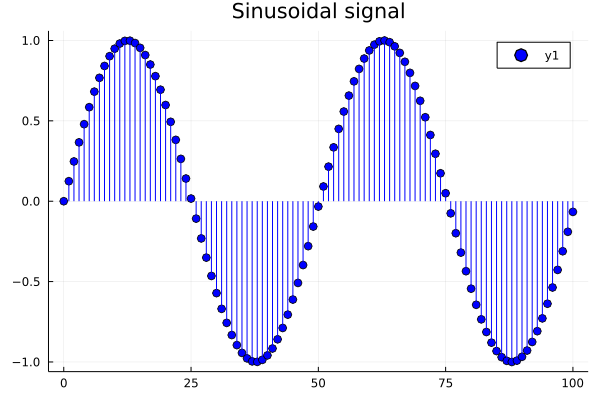

In [23]:
plot(s.n, s.A, line=:stem, title="Sinusoidal signal", marker = :o, color = :blue)

> The same thing can be accomplished with the canonical form constructor:

$$x[n]=sin(\frac{M}{N} 2\pi n)$$

In [24]:
# M = 2
#N = 100 
s = 1.0 * sinseqmn(0,100, 2, 100);

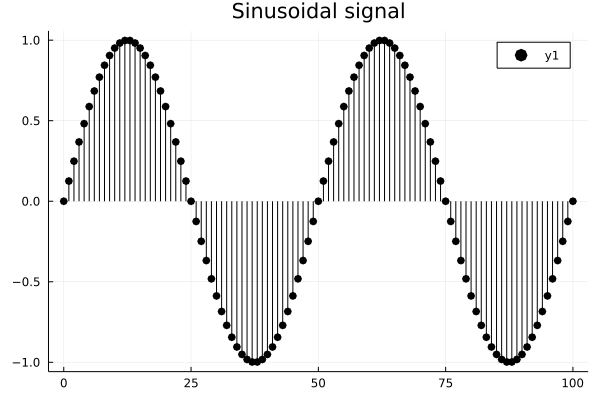

In [25]:
plot(s.n, s.A, line=:stem, title="Sinusoidal signal", marker = :o, color = :black)

# Signal Processing:

Take the above signal and "rectify" it by flipping negative half-cycles to positive.

In [26]:
# going to generate a step sequence mask to filter out negative cycles
# then going to take these negative cycles and flip polarity to positive cycles
# and then add back to the original signal.
# this will result in a signal with only positive cycles

M= stepseq(0,25);

In [27]:
m1 = M |>  sigshift(25);
m2 = M |>  sigshift(75);

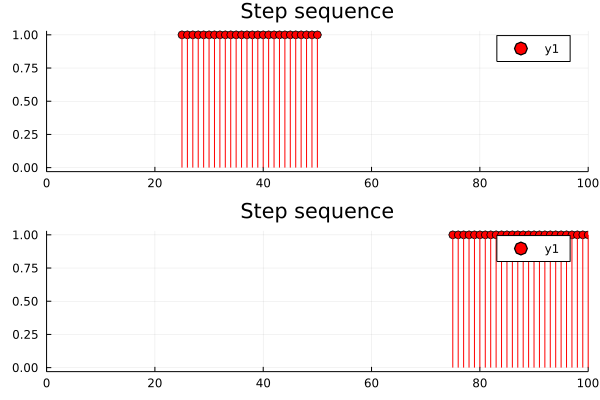

In [28]:
p1 = plot(m1.n, m1.A, line=:stem, title="Step sequence", marker = :o, color = :red, xlims=(0,100))
p2 = plot(m2.n, m2.A, line=:stem, title="Step sequence", marker = :o, color = :red, xlims=(0,100))
plot(p1, p2, layout=(2,1))

In [29]:
mask = m1+m2

signal(Real[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Real[25, 26, 27, 28, 29, 30, 31, 32, 33, 34  …  91, 92, 93, 94, 95, 96, 97, 98, 99, 100])

In [30]:
s2 = s*mask

signal(Real[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  -0.9048270524660192, -0.8443279255020152, -0.7705132427757886, -0.6845471059286885, -0.587785252292472, -0.48175367410171477, -0.3681245526846781, -0.24868988716485388, -0.125333233564304, 1.2864981197413093e-15], Real[0, 1, 2, 3, 4, 5, 6, 7, 8, 9  …  91, 92, 93, 94, 95, 96, 97, 98, 99, 100])

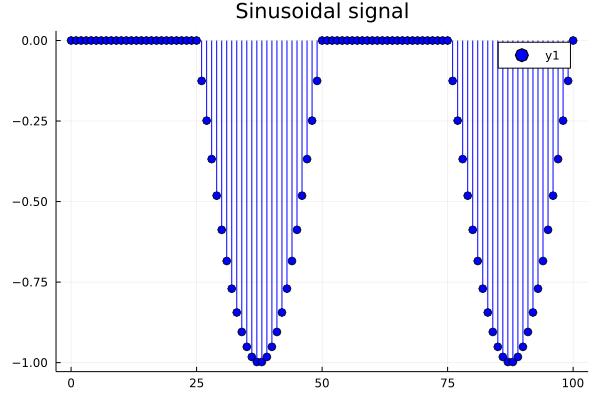

In [31]:
plot(s2.n, s2.A, line=:stem, title="Sinusoidal signal", marker = :o, color = :blue)

In [42]:
s3 = s + (-1*s*mask) + (-1*s*mask);

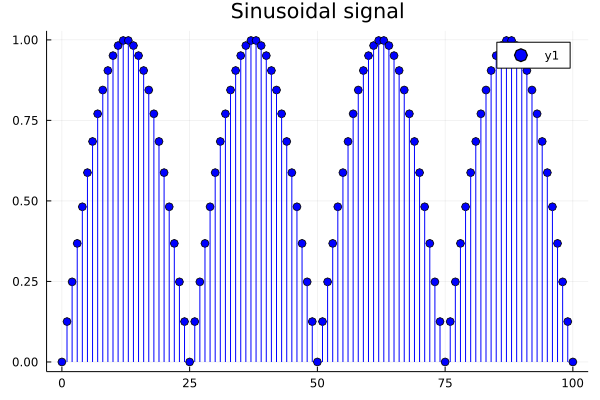

In [33]:
plot(s3.n, s3.A, line=:stem, title="Sinusoidal signal", marker = :o, color = :blue)

In [34]:
s3 = s + (-1*s*mask) + (-1*s*mask);

s3 = s + (-2s*mask);

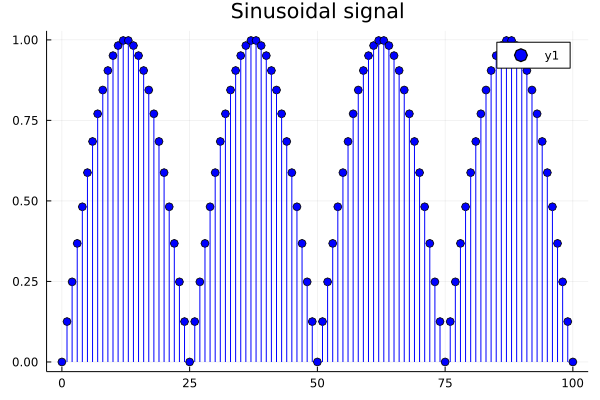

In [35]:
plot(s3.n, s3.A, line=:stem, title="Sinusoidal signal", marker = :o, color = :blue)

# Decomposition and Synthesis

There are several important results in Discrete signal theory. One of them is the decomposition of signals into
Even and Odd signals.

We define __Even signals__ if :

$$Xₑ(-n) = Xₑ(n)$$

Similarly , we define __Odd signals__ if :

$$Xₒ(-n) = Xₒ(n)$$

Any artibrary real-valued signal can be decomposed into Even and Odd signals:

$$x(n) = xₑ(n) + xₒ(n)$$

where even and odd signals are given by:

$$xₑ(n) = \frac{1}{2}[x(n) + x(-n)]$$

$$Xₒ(n) = \frac{1}{2}[x(n) - x(-n)]$$

With our building block function we have already defined, we can now define the synthesis of the signal.

Let $$x(n) = u(n) -u(n-10)$$ , 

Decompose it into Even and Odd signals:

In [36]:
x = stepseq(-30, 30) +  (-1*stepseq(-20,20)|> sigshift(10))



signal(Real[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Real[-30, -29, -28, -27, -26, -25, -24, -23, -22, -21  …  21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

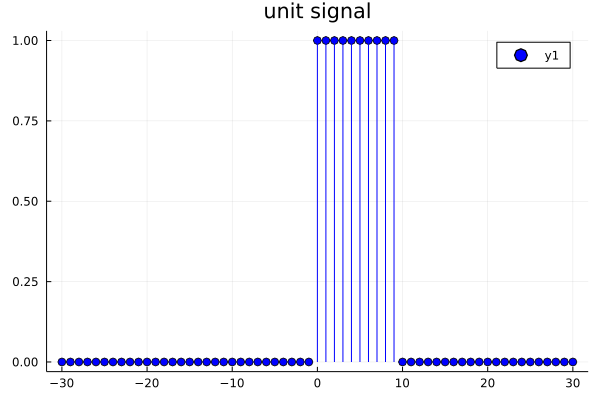

In [37]:
plot(x.n, x.A, line=:stem, title="unit signal", marker = :o, color = :blue)

In [38]:
Xₑ = (1/2)* (x + (x |> sigfold)); # pls see fold function definition

In [39]:
Xₒ = (1/2)* (x + -1*(x |> sigfold)); # pls see fold function definition

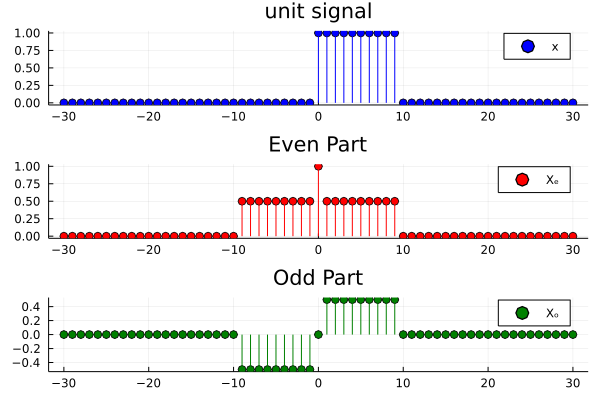

In [40]:
p1 = plot(x.n, x.A, line=:stem, title="unit signal", marker = :o, color = :blue, label = "x")
p2 = plot(Xₑ.n, Xₑ.A, line=:stem, title="Even Part", marker = :o, color = :red, label = "Xₑ")
p3 = plot(Xₒ.n, Xₒ.A, line=:stem, title="Odd Part", marker = :o, color = :green, label = "Xₒ")

plot(p1, p2, p3, layout=(3,1))